In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#statistical test
from scipy.stats import ttest_ind,t
from scipy.stats import barnard_exact
from scipy.stats import chi2_contingency
import scipy.stats as stats

In [2]:
df=pd.read_csv(r'C:\Data Analysis ITI\ITIProjects\ITIProjects\Loan Approval\Data\Loan Approval.csv')
print('length of Train',len(df))

length of Train 614


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# checking for unique values
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [6]:
# checking for null values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Note:** because the Data type of Loan_Status is object so I will replace Loan_Status (Y/N) into (0,1)
to show that  independent column is effect on dependent column or not.

In [7]:
#replace male & female into 1 & 0
df['Loan_Status'].replace(to_replace=['Y', 'N'],
           value=[1,0],inplace = True)

**visualize and analyze the columns**

# Eduction and loan_status

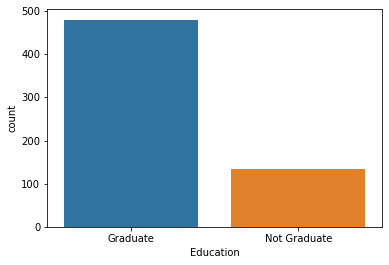

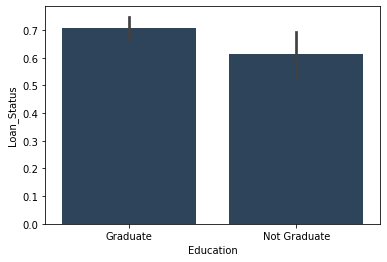

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [16]:
#independent column Education
#Applicant Education (Graduate/ Under Graduate)
sns.countplot(data=df,x='Education')
plt.show()

# to show that Education column is effect on Loan_Status or not 
sns.barplot(x=df['Education'],y=df['Loan_Status'],color='#274461')

plt.show()
df['Education'].value_counts()

In [10]:
contingency_table_edu = pd.crosstab(df['Education'],df['Loan_Status'])
contingency_table_edu

Loan_Status,0,1
Education,,
Graduate,140,340
Not Graduate,52,82


In [11]:
#H0: Pg-Png=0 (NO DIFF)
#H1: Pg-Png != 0 (yes DIFF)

chi_square , p_value , dof , expected=chi2_contingency(contingency_table_edu)
print('Expected:')
print(expected)
print('Chi_square score: ',chi_square)
print('P-value" ',p_value)
print('dof: ',dof)
# p_value < ALFA=0.05 so we will rejected H0

Expected:
[[150.09771987 329.90228013]
 [ 41.90228013  92.09771987]]
Chi_square score:  4.091490413303621
P-value"  0.04309962129357355
dof:  1


In [12]:
from scipy.stats import barnard_exact
barnard_exact(contingency_table_edu)

BarnardExactResult(statistic=-2.1281195302846054, pvalue=0.0335557664713106)

# self employed and loan status

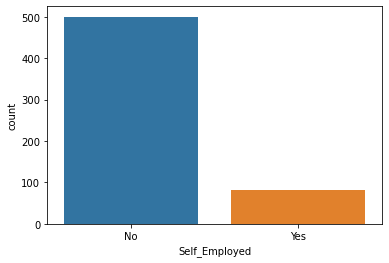

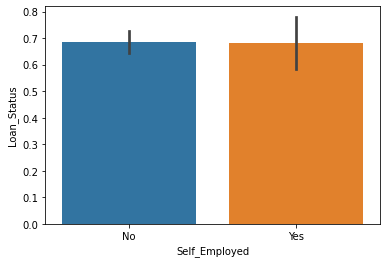

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [17]:
#independent column self employed
#Applicant self employed (Yes/ No)
sns.countplot(data=df,x='Self_Employed')
plt.show()

# to show that self employed column is effect on Loan_Status or not 
sns.barplot(x=df['Self_Employed'],y=df['Loan_Status'])

plt.show()
df['Self_Employed'].value_counts()

In [18]:
contingency_table_self = pd.crosstab(df['Self_Employed'],df['Loan_Status'])
contingency_table_self

Loan_Status,0,1
Self_Employed,,
No,157,343
Yes,26,56


In [19]:
#H0: Pg-Png=0 (NO DIFF)
#H1: Pg-Png != 0 (yes DIFF)

chi_square , p_value , dof , expected=chi2_contingency(contingency_table_self)
print('Expected:')
print(expected)
print('Chi_square score: ',chi_square)
print('P-value" ',p_value)
print('dof: ',dof)
# p_value > ALFA=0.05 so we will not rejected H0

Expected:
[[157.21649485 342.78350515]
 [ 25.78350515  56.21649485]]
Chi_square score:  0.0
P-value"  1.0
dof:  1


# Married and loan_status

In [ ]:
#independent column Education
#Applicant Education (Graduate/ Under Graduate)
sns.countplot(data=df,x='Education')
plt.show()

# to show that Education column is effect on Loan_Status or not 
sns.barplot(x=df['Education'],y=df['Loan_Status'],color='#274461')

plt.show()
df['Education'].value_counts()

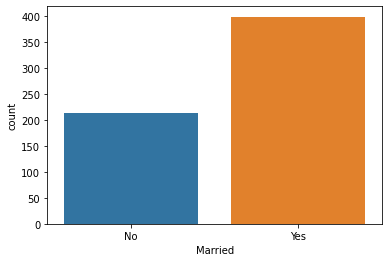

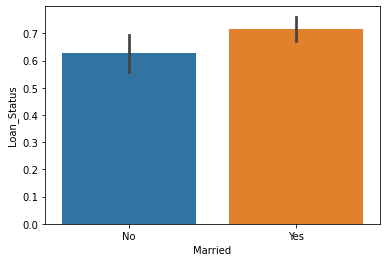

Yes    398
No     213
Name: Married, dtype: int64

In [13]:
#independent column Married
#Applicant married (Y/N)
sns.countplot(data=df,x='Married')
plt.show()

# to show that Married column is effect on Loan_Status or not 
sns.barplot(data=df,x='Married',y='Loan_Status')
plt.show()
df['Married'].value_counts()

In [14]:
contingency_table_mar = pd.crosstab(df['Married'],df['Loan_Status'])
contingency_table_mar

Loan_Status,0,1
Married,,
No,79,134
Yes,113,285


In [15]:
#H0: Pyes-Pno=0 (NO DIFF)
#H1: Pyes-Pno != 0 (yes DIFF)

chi_square , p_value , dof , expected=chi2_contingency(contingency_table_mar)
print('Expected:')
print(expected)
print('Chi_square score: ',chi_square)
print('P-value" ',p_value)
print('dof: ',dof)
# p_value < ALFA=0.05 so we will rejected H0

Expected:
[[ 66.93289689 146.06710311]
 [125.06710311 272.93289689]]
Chi_square score:  4.475019348315097
P-value"  0.03439381301579988
dof:  1


In [16]:
barnard_exact(contingency_table_mar)

BarnardExactResult(statistic=2.206865551070945, pvalue=0.02779306569469745)

# credit_History and Loan_Status

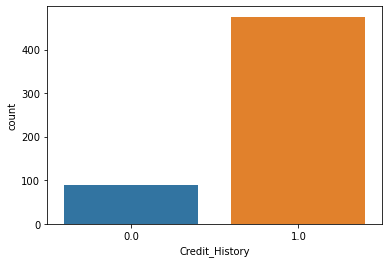

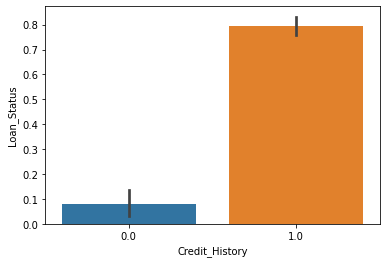

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [17]:
#independent column Credit_History
#Applicant Credit_History (1/0)
sns.countplot(data=df,x='Credit_History')
plt.show()

# to show that Married column is effect on Loan_Status or not 
sns.barplot(data=df,x='Credit_History',y='Loan_Status')
plt.show()
df['Credit_History'].value_counts()

In [18]:
contingency_table_cred = pd.crosstab(df['Credit_History'],df['Loan_Status'])
contingency_table_cred

Loan_Status,0,1
Credit_History,,
0.0,82,7
1.0,97,378


In [19]:
#H0: Pyes-Pno=0 (NO DIFF)
#H1: Pyes-Pno != 0 (yes DIFF)

chi_square , p_value , dof , expected=chi2_contingency(contingency_table_cred)
print('Expected:')
print(expected)
print('Chi_square score: ',chi_square)
print('P-value" ',p_value)
print('dof: ',dof)
# p_value < ALFA=0.05 so we will rejected H0

Expected:
[[ 28.2464539  60.7535461]
 [150.7535461 324.2464539]]
Chi_square score:  174.63729658142535
P-value"  7.184759548750746e-40
dof:  1


# Property_Area and Loan_Status

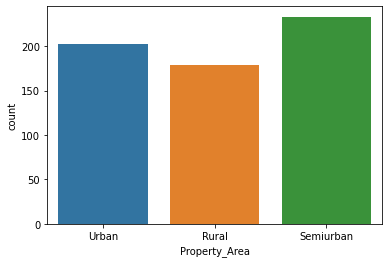

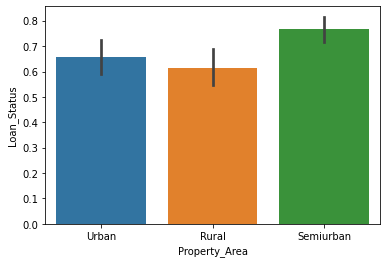

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [20]:
#independent column Credit_History
#Applicant Property_Area (1/0)
sns.countplot(data=df,x='Property_Area')
plt.show()

# to show that Property_Area column is effect on Loan_Status or not 
sns.barplot(data=df,x='Property_Area',y='Loan_Status')
plt.show()
df['Property_Area'].value_counts()

In [21]:
contingency_table_prop = pd.crosstab(df['Property_Area'],df['Loan_Status'])
contingency_table_prop

Loan_Status,0,1
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [22]:
#H0: Pyes-Pno=0 (NO DIFF)
#H1: Pyes-Pno != 0 (yes DIFF)

chi_square , p_value , dof , expected=chi2_contingency(contingency_table_prop)
print('Expected:')
print(expected)
print('Chi_square score: ',chi_square)
print('P-value" ',p_value)
print('dof: ',dof)
# p_value < ALFA=0.05 so we will rejected H0

Expected:
[[ 55.97394137 123.02605863]
 [ 72.85993485 160.14006515]
 [ 63.16612378 138.83387622]]
Chi_square score:  12.297623130485675
P-value"  0.0021360187811644937
dof:  2


# Applicantincome and loan_status

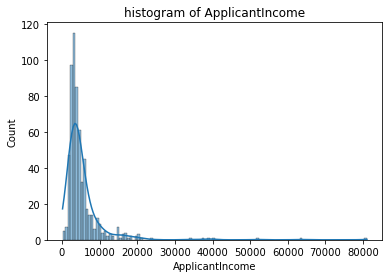

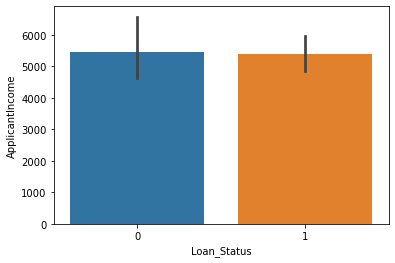

In [16]:
#indepebdent column ApplicantIncome
sns.histplot(data=df,x='ApplicantIncome',kde=True)
plt.title("histogram of ApplicantIncome" )
plt.show()

# to show that Married column is effect on Loan_Status or not 
sns.barplot(data=df,x='Loan_Status',y='ApplicantIncome')
plt.show()

## Test of normality

### Shapiro-Wilk test

In [18]:
log_applicant = np.log(df[['ApplicantIncome']])

In [19]:
#from sklearn.preprocessing import StandardScaler
#ss = StandardScaler()
#app = df[['ApplicantIncome']]
#stand = ss.fit_transform(app)


In [38]:
# null = data normal 
# alternative = not normal 
# Perform Shapiro-Wilk test
statistic, p_value = stats.shapiro(log_applicant)
# Print the test statistic and p-value
print("Shapiro-Wilk Test")
print("Test Statistic:", statistic)
print("p-value:", p_value)

#  p_value < ALFA=0.05 so we will rejected H0 (that means the data is not normal distrbution)

Shapiro-Wilk Test
Test Statistic: 0.9351667165756226
p-value: 1.1202605768083568e-15


In [25]:
Skewness = (3 * (df['ApplicantIncome'].mean()- df['ApplicantIncome'].median())) /  df['ApplicantIncome'].std()
Skewness

0.7812809447601184

In [26]:
CM_0=df[df['Loan_Status'] == 0]['ApplicantIncome']
CM_1=df[df['Loan_Status'] == 1]['ApplicantIncome']

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

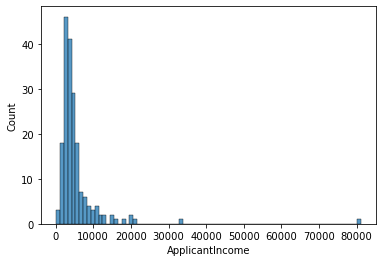

In [45]:
sns.histplot(CM_0)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

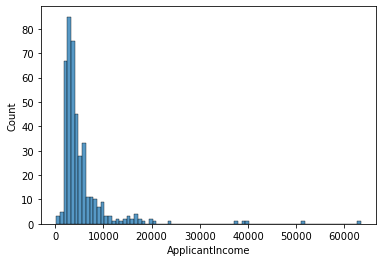

In [46]:
sns.histplot(CM_1)

### Levene test for variance 

In [27]:
CM_0.var()

46506378.52266034

In [28]:
CM_1.var()

33240317.014268644

In [29]:
#h0 is no diff
#h1 yes diff
stats.levene(CM_0, CM_1)
# p_value > ALFA=0.05 so we will not rejected H0

LeveneResult(statistic=0.041357686256057014, pvalue=0.8389166546345368)

### Mann-Whitney U test

In [48]:
from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U test
test_statistic, p_value = mannwhitneyu(CM_0, CM_1)

# Print the test results
print("Mann-Whitney U Test")
print("Test Statistic:", test_statistic)
print("p-value:", p_value)
# p_value > ALFA=0.05 so we will not rejected H0

Mann-Whitney U Test
Test Statistic: 40722.0
p-value: 0.91811428057985


# Applicantincome and Education

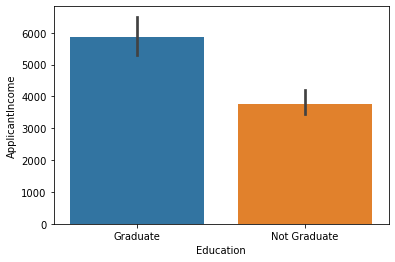

In [31]:
# to show that Married column is effect on Loan_Status or not 
sns.barplot(data=df,x='Education',y='ApplicantIncome')
plt.show()

In [32]:
CM_grad=df[df['Education'] == 'Graduate']['ApplicantIncome']
CM_NotGrad=df[df['Education'] == 'Not Graduate']['ApplicantIncome']

### Levene test for variance 

In [33]:
CM_grad.var()

45424876.45901177

In [34]:
CM_NotGrad.var()

5004534.024239702

In [35]:
#h0 is no diff
#h1 yes diff
stats.levene(CM_grad, CM_NotGrad)
# p_value < ALFA=0.05 so we will rejected H0

LeveneResult(statistic=9.283662145199523, pvalue=0.002411655737460072)

### Kruskal-Wallis test  

In [39]:
#H0: M0-M1=0 (NO DIFF)
#H1: M0-M1 != 0 (yes DIFF)
import pandas as pd
from scipy.stats import kruskal


# Perform Kruskal-Wallis test
test_statistic, p_value = kruskal(CM_grad,CM_NotGrad)

# Print the test statistic and p-value
print("Kruskal-Wallis Test")
print("Test Statistic:", test_statistic)
print("p-value:", p_value)


# p_value < ALFA=0.05 so we will rejected H0

Kruskal-Wallis Test
Test Statistic: 22.02135539498042
p-value: 2.6963367410790626e-06
